In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from time import time
import matplotlib.pyplot as plt
from zipfile import ZipFile   
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
corpus = pd.read_csv("C:/Users/Lenovo/PycharmProject/Random Forest/venv/traindata.csv")
corpus.head()

,review,label
0,start mg zoloft week ago long term anxieti dep...,0
1,ok promis ac one month could ask better result,1
2,rare troubl fall asleep use use stay asleep wa...,0
3,final found drug work month lost lbs sugar lev...,1
4,unawar suffer ocd long time obsess thought con...,0


In [3]:
corpus_test = pd.read_csv("C:/Users/Lenovo/PycharmProject/Random Forest/venv/testdata.csv")
corpus_test.head()

,review,label
0,prescrib remeron month miracl help put weight ...,0
1,bydureon six month notic big improv ac last ap...,1
2,trulic month month ago thought pancreat stomac...,1
3,start take adipex p june lbs f quot today weig...,0
4,oral med bring ac fast blood sugar stay theand...,1


In [4]:
x_train = corpus['review']
x_test = corpus_test['review']
y_train= corpus['label'].values
y_test = corpus_test['label'].values

In [5]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
rf = RandomForestClassifier(n_estimators=100, random_state=0)
n_features = np.arange(5000,200001,19500)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, ngram_range=(1, 1), classifier=rf):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result



In [6]:
tvec = TfidfVectorizer()


feature_result_uni = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 1))
feature_result_bi = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(2, 2))
feature_result_tri = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(3, 3))
feature_result_ubi = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_utri = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))
feature_result_bitri = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(2, 3))


nfeatures_plot_uni = pd.DataFrame(feature_result_uni,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bi = pd.DataFrame(feature_result_bi,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tri = pd.DataFrame(feature_result_tri,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ubi = pd.DataFrame(feature_result_ubi,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_utri = pd.DataFrame(feature_result_utri,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bitri = pd.DataFrame(feature_result_bitri,columns=['nfeatures','validation_accuracy','train_test_time'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Validation result for 5000 features
null accuracy: 50.59%
accuracy score: 95.69%
model is 45.11% more accurate than null accuracy
train and test time: 6.87s
--------------------------------------------------------------------------------
Validation result for 24500 features
null accuracy: 50.59%
accuracy score: 95.21%
model is 44.62% more accurate than null accuracy
train and test time: 4.94s
----------------------------------------------------------

null accuracy: 50.59%
accuracy score: 84.25%
model is 33.66% more accurate than null accuracy
train and test time: 65.87s
--------------------------------------------------------------------------------
Validation result for 141500 features
null accuracy: 50.59%
accuracy score: 84.25%
model is 33.66% more accurate than null accuracy
train and test time: 53.65s
--------------------------------------------------------------------------------
Validation result for 161000 features
null accuracy: 50.59%
accuracy score: 84.25%
model is 33.66% more accurate than null accuracy
train and test time: 64.75s
--------------------------------------------------------------------------------
Validation result for 180500 features
null accuracy: 50.59%
accuracy score: 84.25%
model is 33.66% more accurate than null accuracy
train and test time: 56.90s
--------------------------------------------------------------------------------
Validation result for 200000 features
null accuracy: 50.59%
accuracy score

null accuracy: 50.59%
accuracy score: 90.22%
model is 39.63% more accurate than null accuracy
train and test time: 11.68s
--------------------------------------------------------------------------------
Validation result for 44000 features
null accuracy: 50.59%
accuracy score: 89.73%
model is 39.14% more accurate than null accuracy
train and test time: 17.42s
--------------------------------------------------------------------------------
Validation result for 63500 features
null accuracy: 50.59%
accuracy score: 90.80%
model is 40.22% more accurate than null accuracy
train and test time: 22.09s
--------------------------------------------------------------------------------
Validation result for 83000 features
null accuracy: 50.59%
accuracy score: 89.73%
model is 39.14% more accurate than null accuracy
train and test time: 29.09s
--------------------------------------------------------------------------------
Validation result for 102500 features
null accuracy: 50.59%
accuracy score: 9

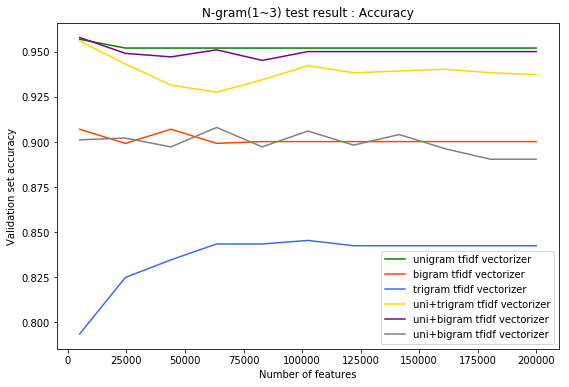

In [7]:
plt.figure(figsize=(9,6))
plt.plot(nfeatures_plot_uni.nfeatures, nfeatures_plot_uni.validation_accuracy, label='unigram tfidf vectorizer',color='green')
plt.plot(nfeatures_plot_bi.nfeatures, nfeatures_plot_bi.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_tri.nfeatures, nfeatures_plot_tri.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_utri.nfeatures, nfeatures_plot_utri.validation_accuracy,label='uni+trigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ubi.nfeatures, nfeatures_plot_ubi.validation_accuracy,label='uni+bigram tfidf vectorizer',color='purple')
plt.plot(nfeatures_plot_bitri.nfeatures, nfeatures_plot_bitri.validation_accuracy,label='uni+bigram tfidf vectorizer',color='grey')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")

plt.legend()
plt.savefig('./tfidf.png', format='png', dpi=2000, bbox_inches="tight")